In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gaussian_naive_bayes import GaussianNaiveBayes

np.random.seed(0)
mean_0 = [2, 2]
mean_1 = [6, 6]
cov = [[1, 0.5], [0.5, 1]]  # diagonal covariance

X0 = np.random.multivariate_normal(mean_0, cov, 100)
X1 = np.random.multivariate_normal(mean_1, cov, 100)

X = np.vstack((X0, X1))
y = np.array([0] * 100 + [1] * 100)

In [3]:
model = GaussianNaiveBayes()
model.fit(X, y)
preds = model.predict(X)

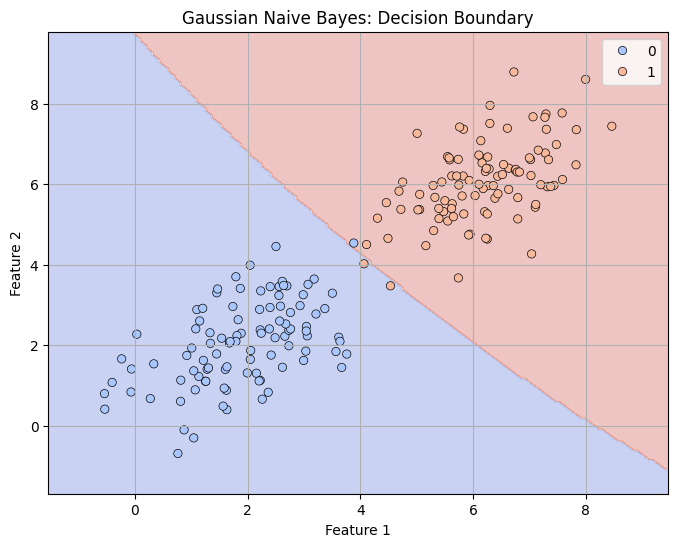

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_preds, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("Gaussian Naive Bayes: Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()